In [308]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
df_house = pd.read_csv("df_beijinghouse_geo.csv")
df_house.head()

,longitude,latitude,heat_con,layout,location,neighborhood,type_layout,area,building,decoration,direction,heat,name,price,subway,url,visiting,zone,zoneinfo
0,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,40平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5530,NaN,https://bj.lianjia.com/zufang/BJ0004868491.html,NaN,广安门租房/高楼层(共18层)/1993年建塔楼,1室1厅
1,116.396765,39.857360,集中供暖,整租,洋桥,丰台,房屋户型：1室1厅1卫 整租,45平米,海户西里,原味,南,集中供暖,海户西里1居室,5960,近地铁,https://bj.lianjia.com/zufang/BJ0004872617.html,随时看房,洋桥租房/低楼层(共18层)/1993年建塔楼,1室1厅
2,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,46平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5430,NaN,https://bj.lianjia.com/zufang/BJ0004872565.html,NaN,广安门租房/高楼层(共6层)/1992年建板楼,1室1厅
3,116.931683,38.714061,集中供暖,整租,马甸,西城,房屋户型：1室1厅1卫 整租,60平米,阳光丽景,原味,北,集中供暖,阳光丽景1居室,8930,近地铁,https://bj.lianjia.com/zufang/BJ0004879242.html,随时看房,马甸租房/低楼层(共16层)/2003年建板塔结合,1室1厅
4,116.338077,40.082796,自供暖,合租,回龙观,昌平,房屋户型：3室1厅1卫 合租,15平米,龙腾苑三区,自如友家4.0拿铁,南,自供暖,龙腾苑三区3居室 01卧,3690,近地铁,https://bj.lianjia.com/zufang/BJ0004846189.html,随时看房,回龙观租房/低楼层(共6层)/2002年建板楼,3室1厅


In [310]:
df_house["type_layout"].isnull().value_counts()

False    2987
True       13
Name: type_layout, dtype: int64

In [311]:
df_house["layout_info"] = df_house["type_layout"].str.extract(r"^房屋户型：(\w.*)\s+.*租")

In [312]:
df_house.head()

,longitude,latitude,heat_con,layout,location,neighborhood,type_layout,area,building,decoration,direction,heat,name,price,subway,url,visiting,zone,zoneinfo,layout_info
0,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,40平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5530,NaN,https://bj.lianjia.com/zufang/BJ0004868491.html,NaN,广安门租房/高楼层(共18层)/1993年建塔楼,1室1厅,1室1厅1卫
1,116.396765,39.857360,集中供暖,整租,洋桥,丰台,房屋户型：1室1厅1卫 整租,45平米,海户西里,原味,南,集中供暖,海户西里1居室,5960,近地铁,https://bj.lianjia.com/zufang/BJ0004872617.html,随时看房,洋桥租房/低楼层(共18层)/1993年建塔楼,1室1厅,1室1厅1卫
2,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,46平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5430,NaN,https://bj.lianjia.com/zufang/BJ0004872565.html,NaN,广安门租房/高楼层(共6层)/1992年建板楼,1室1厅,1室1厅1卫
3,116.931683,38.714061,集中供暖,整租,马甸,西城,房屋户型：1室1厅1卫 整租,60平米,阳光丽景,原味,北,集中供暖,阳光丽景1居室,8930,近地铁,https://bj.lianjia.com/zufang/BJ0004879242.html,随时看房,马甸租房/低楼层(共16层)/2003年建板塔结合,1室1厅,1室1厅1卫
4,116.338077,40.082796,自供暖,合租,回龙观,昌平,房屋户型：3室1厅1卫 合租,15平米,龙腾苑三区,自如友家4.0拿铁,南,自供暖,龙腾苑三区3居室 01卧,3690,近地铁,https://bj.lianjia.com/zufang/BJ0004846189.html,随时看房,回龙观租房/低楼层(共6层)/2002年建板楼,3室1厅,3室1厅1卫


In [313]:
df_house['area'] = df_house['area'].str.extract(r"^(\d.*)平米")

In [314]:
df_house_sub = df_house[['neighborhood','location','building','layout', 
                         'layout_info', 'area', 'price', 'heat_con',
                         'direction','decoration' ,'longitude', 'latitude']]

In [315]:
df_house_sub.to_csv("beijing_house_info.csv",index=False)

In [316]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
0,西城,广安门,车站西街17号院,整租,1室1厅1卫,40,5530,集中供暖,南,NaN,116.346931,39.884589
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5960,集中供暖,南,原味,116.396765,39.857360
2,西城,广安门,车站西街17号院,整租,1室1厅1卫,46,5430,集中供暖,南,NaN,116.346931,39.884589
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8930,集中供暖,北,原味,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3690,自供暖,南,自如友家4.0拿铁,116.338077,40.082796


In [317]:
df_house_sub.dtypes

neighborhood     object
location         object
building         object
layout           object
layout_info      object
area             object
price             int64
heat_con         object
direction        object
decoration       object
longitude       float64
latitude        float64
dtype: object

In [318]:
df_house_sub['area'].astype(int)

0        40
1        45
2        46
3        60
4        15
5        12
6         7
7        56
8        15
9        10
10       56
11       12
12       42
13       57
14       65
15       14
16       54
17       18
18       60
19        8
20       48
21       21
22        8
23       45
24       14
25       63
26       15
27       11
28       13
29       61
       ... 
2970    194
2971     77
2972     71
2973     60
2974    120
2975     85
2976     57
2977     89
2978    148
2979     88
2980    285
2981     67
2982     88
2983    157
2984    120
2985    291
2986     64
2987    104
2988     61
2989    134
2990    134
2991     52
2992     85
2993    199
2994     43
2995     88
2996     49
2997     38
2998     89
2999     58
Name: area, Length: 3000, dtype: int64

In [319]:
df_house_sub['decoration'].value_counts()

精装修          118
原味            56
自如友家4.0拿铁     25
自如友家4.0米苏     22
自如友家4.0布丁     14
自如友家4.0木棉     11
自如整租2.0原味      3
业主直租原味         2
自如友家4.0原味      2
自如友家3.0木棉      2
自如友家2.0拿铁      1
自如友家3.0布丁      1
自如友家3.0米苏      1
Name: decoration, dtype: int64

In [320]:
df_house_sub.groupby('decoration').price.value_counts()

decoration  price
业主直租原味      7400     2
原味          6660     3
            7990     3
            5690     2
            6390     2
            8090     2
            8360     2
            22000    2
            4160     1
            4190     1
            4390     1
            4490     1
            4790     1
            4990     1
            5560     1
            5660     1
            5730     1
            5790     1
            5890     1
            5960     1
            6060     1
            6090     1
            6130     1
            6330     1
            6490     1
            6590     1
            6760     1
            6960     1
            7060     1
            7090     1
                    ..
自如友家4.0木棉   2260     3
            2990     2
            3030     1
            3390     1
            3490     1
            3890     1
            4660     1
            5730     1
自如友家4.0米苏   2390     2
            2790     2
            4630     2
            1430

In [321]:
df_house_sub['decoration'] = df_house_sub['decoration'].replace('.*原味', '业主直租',regex=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
df_house_sub['decoration'].value_counts()

精装修          118
业主直租          63
自如友家4.0拿铁     25
自如友家4.0米苏     22
自如友家4.0布丁     14
自如友家4.0木棉     11
自如友家3.0木棉      2
自如友家2.0拿铁      1
自如友家3.0布丁      1
自如友家3.0米苏      1
Name: decoration, dtype: int64

In [323]:
df_house_sub['decoration'].isnull().value_counts()

True     2742
False     258
Name: decoration, dtype: int64

In [324]:
df_house_sub['decoration'] = df_house_sub['decoration'].fillna("Not stated")

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [325]:
df_house_sub['decoration'].value_counts()

Not stated    2742
精装修            118
业主直租            63
自如友家4.0拿铁       25
自如友家4.0米苏       22
自如友家4.0布丁       14
自如友家4.0木棉       11
自如友家3.0木棉        2
自如友家2.0拿铁        1
自如友家3.0布丁        1
自如友家3.0米苏        1
Name: decoration, dtype: int64

In [326]:
df_house_sub['decoration'] = df_house_sub['decoration'].replace("精装修","Exquisite",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("业主直租", "Direct rent by owner",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0拿铁", "Ziroom Decorate 4.0 Latte",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0米苏", "Ziroom Decorate 4.0 Misu",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0布丁", "Ziroom Decorate 4.0 Pudding",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0木棉", "Ziroom Decorate 4.0 Mumian",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0木棉", "Ziroom Decorate 3.0 Mumian",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0布丁", "Ziroom Decorate 3.0 Pudding",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0米苏", "Ziroom Decorate 3.0 Misu",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家2.0拿铁", "Ziroom Decorate 3.0 Mumian",regex=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [327]:
df_house_sub['price'] = df_house_sub['price'] / 1000

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [328]:
df_house_sub[df_house_sub['decoration'] == 'Exquisite'].sort_values(by='price',ascending=False)

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
1166,朝阳,建国门外,嘉华世纪公寓,整租,3室1厅3卫,214,85.0,集中供暖,东 南 西 北,Exquisite,116.447147,39.911584
1006,朝阳,建国门外,嘉华世纪公寓,整租,3室1厅3卫,214,85.0,集中供暖,东 南 西 北,Exquisite,116.447147,39.911584
1939,朝阳,亚运村,华悦国际公寓,整租,8室2厅3卫,176,44.0,集中供暖,南 北,Exquisite,116.419831,40.013101
867,西城,金融街,金宸国际公寓,整租,3室2厅2卫,205,43.0,集中供暖,南 北,Exquisite,116.368592,39.918905
1759,西城,金融街,金宸国际公寓,整租,3室1厅2卫,205,40.0,集中供暖,南 北,Exquisite,116.368592,39.918905
990,朝阳,朝青,天鹅湾南区,整租,3室2厅4卫,247,40.0,集中供暖,东 南 北,Exquisite,116.529668,39.926712
1163,东城,工体,聚龙花园,整租,2室1厅2卫,195,35.0,集中供暖,东南,Exquisite,116.448577,39.935428
886,朝阳,石佛营,公园1872,整租,4室2厅2卫,242,32.0,集中供暖,南 西 北,Exquisite,NaN,NaN
1280,西城,马甸,华尊大厦,整租,3室2厅1卫,226,30.0,集中供暖,东南,Exquisite,116.389262,39.977657
2507,东城,金宝街,禾风仕家,整租,3室2厅2卫,173,30.0,自供暖,西北,Exquisite,116.403854,39.941606


In [329]:
df_house_sub_1 = df_house_sub[df_house_sub['layout'] == '整租']
df_house_sub_1.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
0,西城,广安门,车站西街17号院,整租,1室1厅1卫,40,5.53,集中供暖,南,Not stated,116.346931,39.884589
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5.96,集中供暖,南,Direct rent by owner,116.396765,39.857360
2,西城,广安门,车站西街17号院,整租,1室1厅1卫,46,5.43,集中供暖,南,Not stated,116.346931,39.884589
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8.93,集中供暖,北,Direct rent by owner,116.931683,38.714061
7,丰台,洋桥,马家堡东里,整租,2室1厅1卫,56,6.33,集中供暖,东,Not stated,116.392411,39.862532


In [330]:
df_house_sub_2 = df_house_sub[df_house_sub['layout'] == '合租']
df_house_sub_2.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.69,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
5,海淀,白石桥,钢铁研究院,合租,3室1厅1卫,12,4.79,暂无数据,南,Not stated,101.730143,26.588609
6,丰台,洋桥,海户西里33号院,合租,3室1厅1卫,7,2.39,集中供暖,北,Not stated,116.396070,39.857039
8,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.16,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
9,海淀,清河,宝盛北里,合租,3室1厅1卫,10,3.76,集中供暖,南,Not stated,116.375518,40.044379


In [331]:
df_house_sub['layout'].value_counts()

暂无数据    1453
整租      1341
合租       193
Name: layout, dtype: int64

In [332]:
df_house_sub[df_house_sub['layout'] == '暂无数据']

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
60,燕郊,福成四期,燕园公寓,暂无数据,NaN,70,1.300,集中供暖,南 北,Not stated,115.844103,28.763448
62,丰台,刘家窑,建邦华府,暂无数据,NaN,104,8.800,集中供暖,南 北,Not stated,120.562292,31.445456
63,燕郊,燕顺路东,福城上上城三季,暂无数据,NaN,86,1.500,集中供暖,西南,Not stated,116.847381,39.960919
65,燕郊,燕顺路东,福城上上城三季,暂无数据,NaN,93,1.500,集中供暖,南 北,Not stated,116.847381,39.960919
66,燕郊,福成五期公交总站,福城上上城五期,暂无数据,NaN,49,1.000,集中供暖,南,Not stated,116.847381,39.960919
68,燕郊,首尔甜城,首尔甜城MOBO公寓,暂无数据,NaN,82,1.800,集中供暖,西北,Not stated,116.480692,40.003426
73,海淀,学院路,富润家园,暂无数据,NaN,55,6.900,集中供暖,东,Not stated,116.360661,40.006011
74,燕郊,福成四期,雷捷小区,暂无数据,NaN,85,1.300,集中供暖,南 北,Not stated,116.834302,39.952483
78,燕郊,首尔甜城,首尔甜城二期,暂无数据,NaN,125,2.200,集中供暖,南 北,Not stated,116.480692,40.003426
80,燕郊,燕顺路国道,东方御景,暂无数据,NaN,110,2.500,集中供暖,南 北,Not stated,111.263483,39.854362


In [403]:
sns.set(rc={
    'figure.figsize':(20,10),
     'axes.edgecolor': '.8',
     'axes.facecolor': '#F8F7F3',
     'figure.facecolor': '#F8F7F3',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.spines.bottom': True,
     'axes.spines.left': True,
     'axes.spines.right': True,
     'axes.spines.top': True,
     #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
     'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    
})

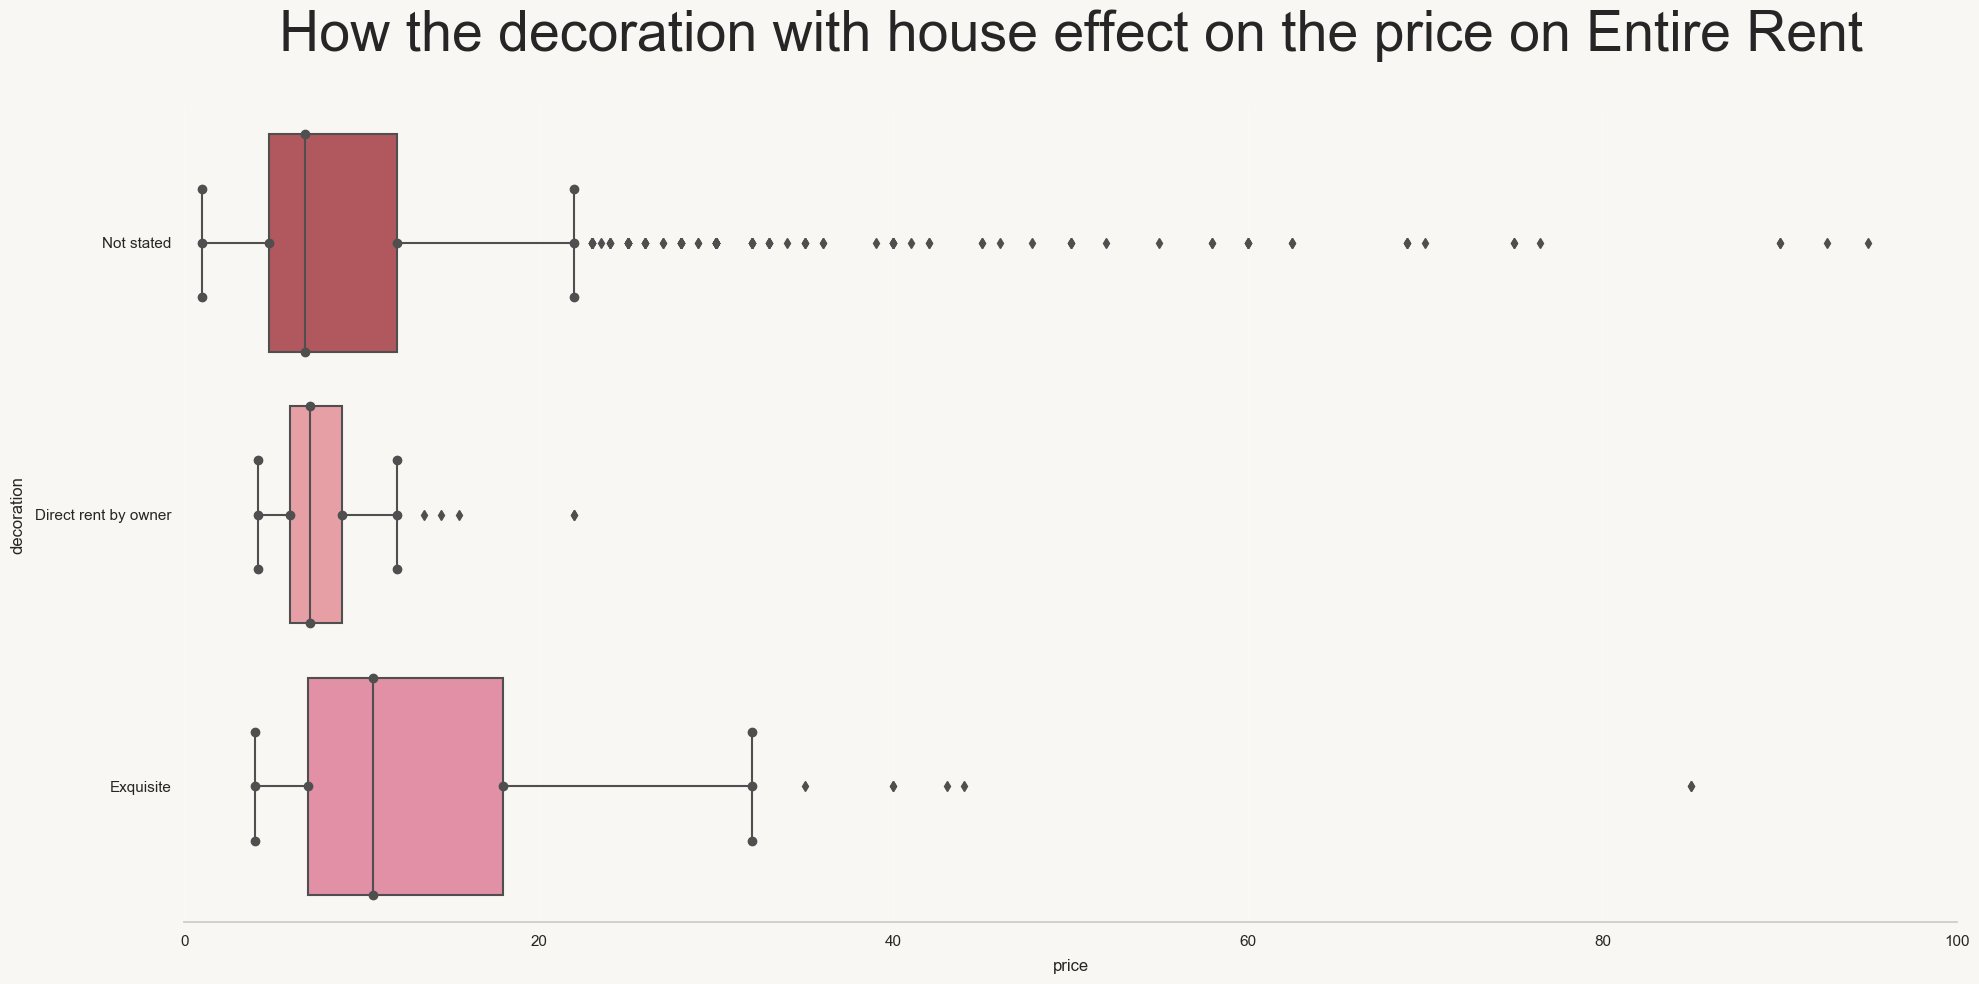

In [415]:
ax = sns.boxplot(y='decoration', x='price', data=df_house_sub_1, orient='h')
sns.set(font='Arial Unicode MS')
plt.xlim(0, 100)
# sns.set(rc={'figure.figsize':(20,10)})
sns.despine(left=True)
ax.set_title("How the decoration with house effect on the price on Entire Rent", pad=40);
ax.title.set_fontsize(40)
ax.title.set_fontname('Arial Unicode MS')

plt.tight_layout()
plt.savefig('output1.pdf')



In [336]:
df_house_sub_2['decoration'].value_counts()

Not stated                     115
Ziroom Decorate 4.0 Latte       25
Ziroom Decorate 4.0 Misu        21
Ziroom Decorate 4.0 Pudding     14
Ziroom Decorate 4.0 Mumian      11
Ziroom Decorate 3.0 Mumian       3
Direct rent by owner             2
Ziroom Decorate 3.0 Pudding      1
Ziroom Decorate 3.0 Misu         1
Name: decoration, dtype: int64

In [340]:
df_house_sub_2[(df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Pudding') | 
               (df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Misu') |
               (df_house_sub_2['decoration'] == 'Direct rent by owner') |
               (df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Mumian')
                           
              ]

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
525,朝阳,团结湖,团结湖路,合租,3室1厅1卫,11,3.23,集中供暖,南,Ziroom Decorate 3.0 Mumian,116.473623,39.932767
671,朝阳,朝阳门外,东大桥路,合租,2室1厅1卫,14,3.93,集中供暖,东南,Ziroom Decorate 3.0 Mumian,116.456770,39.922361
1911,海淀,双榆树,双榆树北路,合租,2室1厅1卫,15,5.06,集中供暖,南,Direct rent by owner,116.329657,39.978495
1959,东城,东直门,后永康胡同2号院4号院,合租,2室1厅1卫,15,3.19,集中供暖,南,Ziroom Decorate 3.0 Mumian,116.430301,39.950666
2482,朝阳,农展馆,农展南里,合租,3室1厅1卫,15,3.96,集中供暖,南,Direct rent by owner,116.472863,39.940866


In [338]:
df_house_sub_2.drop(index=33, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [339]:
df_house_sub_2.drop(index=569, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [341]:
df_house_sub_2.drop(index=525, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [342]:
df_house_sub_2.drop(index=671, inplace=True)
df_house_sub_2.drop(index=1911, inplace=True)
df_house_sub_2.drop(index=1959, inplace=True)
df_house_sub_2.drop(index=2482, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [343]:
df_house_sub_2['decoration'].value_counts()

Not stated                     115
Ziroom Decorate 4.0 Latte       25
Ziroom Decorate 4.0 Misu        21
Ziroom Decorate 4.0 Pudding     14
Ziroom Decorate 4.0 Mumian      11
Name: decoration, dtype: int64

In [417]:
sns.set(rc={
    'figure.figsize':(20,10),
     'axes.edgecolor': '.8',
     'axes.facecolor': '#F8F7F3',
     'figure.facecolor': '#F8F7F3',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.spines.bottom': True,
     'axes.spines.left': True,
     'axes.spines.right': True,
     'axes.spines.top': True,
     #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
     'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#de95ba', '#134857','#66a9c9', '#22a2c3', '#134857']),
    
})

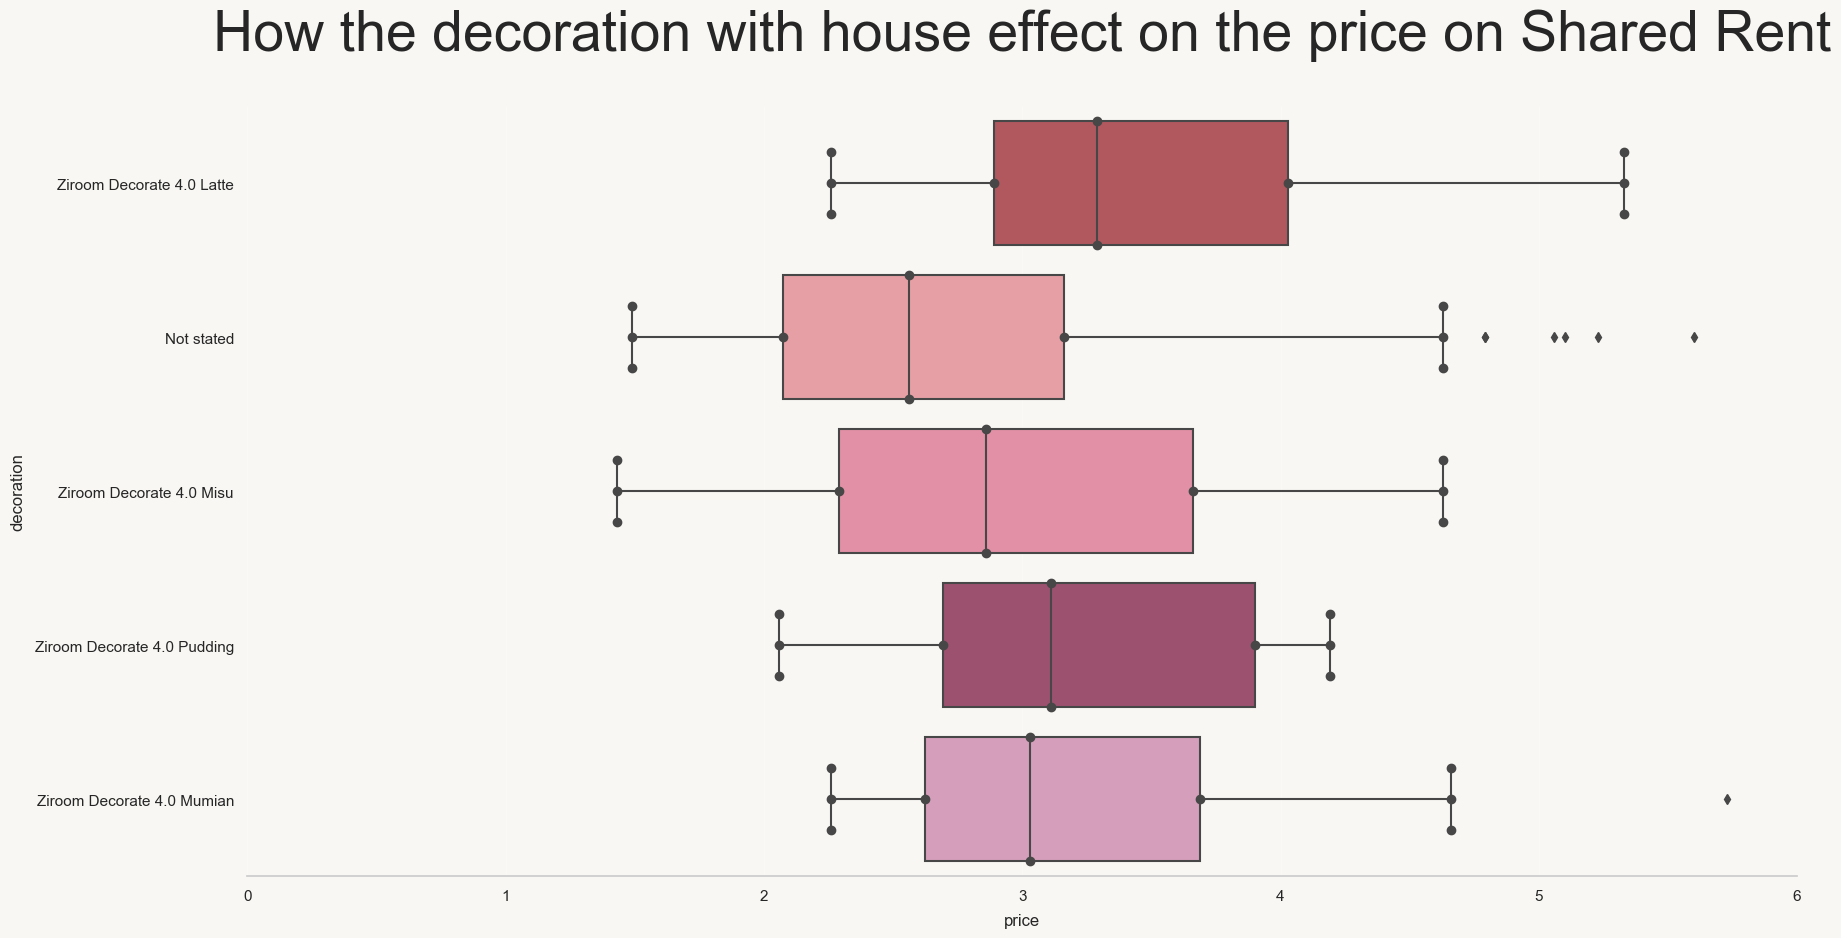

In [418]:
ax2 = sns.boxplot(y='decoration', x='price', data=df_house_sub_2, orient='h')
# sns.set(font='Arial Unicode MS')
plt.xlim(0, 6)
sns.despine(left=True)
ax2.set_title("How the decoration with house effect on the price on Shared Rent", pad=40);
ax2.title.set_fontsize(40)
ax2.title.set_fontname('Arial Unicode MS')

plt.savefig('output2.pdf')

In [223]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
0,西城,广安门,车站西街17号院,整租,1室1厅1卫,40,5.53,集中供暖,南,Not stated,116.346931,39.884589
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5.96,集中供暖,南,Direct rent by owner,116.396765,39.857360
2,西城,广安门,车站西街17号院,整租,1室1厅1卫,46,5.43,集中供暖,南,Not stated,116.346931,39.884589
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8.93,集中供暖,北,Direct rent by owner,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.69,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796


In [224]:
df_house_sub['area']

0        40
1        45
2        46
3        60
4        15
5        12
6         7
7        56
8        15
9        10
10       56
11       12
12       42
13       57
14       65
15       14
16       54
17       18
18       60
19        8
20       48
21       21
22        8
23       45
24       14
25       63
26       15
27       11
28       13
29       61
       ... 
2970    194
2971     77
2972     71
2973     60
2974    120
2975     85
2976     57
2977     89
2978    148
2979     88
2980    285
2981     67
2982     88
2983    157
2984    120
2985    291
2986     64
2987    104
2988     61
2989    134
2990    134
2991     52
2992     85
2993    199
2994     43
2995     88
2996     49
2997     38
2998     89
2999     58
Name: area, Length: 3000, dtype: object

In [225]:
df_house_sub.dtypes

neighborhood     object
location         object
building         object
layout           object
layout_info      object
area             object
price           float64
heat_con         object
direction        object
decoration       object
longitude       float64
latitude        float64
dtype: object

In [359]:
df_house_sub['area'] = df_house_sub['area'].astype(int)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [419]:
#style
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#F8F7F3',
    'axes.facecolor': '#F8F7F3',
#     'figure.facecolor': '#474744',
#     'axes.facecolor': '#474744',
    'font.family': 'Sans serif',
    'font.weight': 'normal',
    'lines.linewidth': 2.5, 
    'lines.marker': 'o',
    'lines.markersize'  : 3,
    'lines.solid_capstyle': 'butt',
    'lines.markeredgewidth'  : 1.0, 
    'lines.solid_joinstyle' : 'miter',
    'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    #'axes.prop_cycle': cycler('color', ['#1DACE8', '#EDCB64', '#B5966D', '#DAECED', '#CECD7B', '#76A08A', '#F7B0AA']),
    #'axes.prop_cycle': cycler('color', ['#ffd9e8', '#de95ba', '#7f4a88', '#4a266a', '#e45a84', '#ffacac', '#b80257']),
    #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
    #'axes.prop_cycle': cycler('color', ['#88304e']),
    #'axes.prop_cycle': cycler('color', ['#e23e57', '#88304e', '#522546', '#311d3f', '#0881a3', '#3e6b89', '#071a52']),
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.linewidth': 0.2,
    'axes.labelsize': 'large',
    'axes.labelpad': 7.0, 
    'ytick.left': False,
    'xtick.bottom' : False,
    'axes.grid': True,
#     'text.color': 'white',
    'grid.color': 'white',
    'grid.alpha': 0.3,
    'grid.linewidth': 0.4,
    'grid.linestyle': '--',
    'legend.loc': 'best',
    'legend.fancybox': True,  
    'ytick.labelsize': 'medium',
    'savefig.facecolor' : '#F8F7F3'
#     'savefig.facecolor' : '#474744'
})

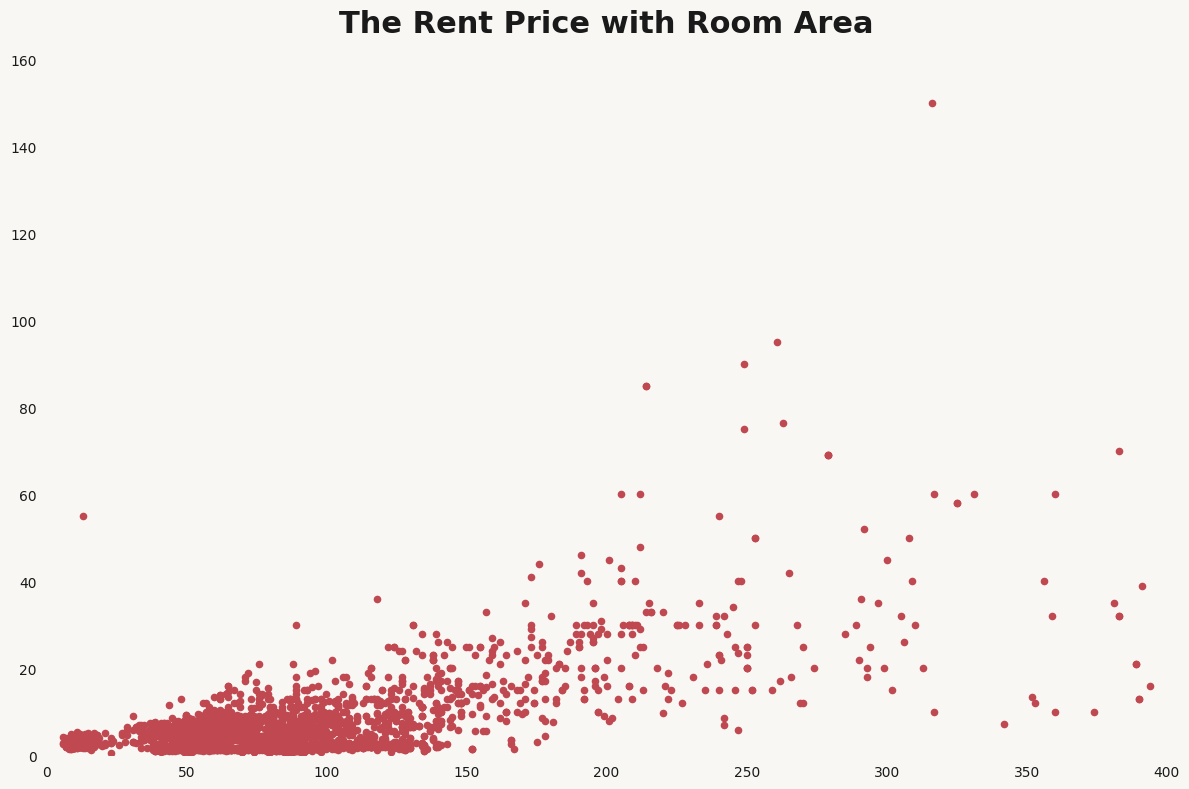

In [420]:
ax = df_house_sub.plot.scatter(x='area', y='price', figsize=(12,8),)
ax.set_title("The Rent Price with Room Area", fontsize=22, pad=20, loc ='center', weight='bold')
ax.grid(False)
ax.set_xlim(0,400)
ax.set_ylim(0,160)
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.savefig('output3.pdf')



In [128]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
0,西城,广安门,车站西街17号院,整租,1室1厅1卫,40,5530,集中供暖,南,Not stated,116.346931,39.884589
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5960,集中供暖,南,Direct rent by owner,116.396765,39.857360
2,西城,广安门,车站西街17号院,整租,1室1厅1卫,46,5430,集中供暖,南,Not stated,116.346931,39.884589
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8930,集中供暖,北,Direct rent by owner,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3690,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796


In [423]:
df_house_sub_1_nbh = df_house_sub_1.groupby('neighborhood').price.mean().reset_index(name = 'price_mean')
df_house_sub_1_nbh

,neighborhood,price_mean
0,东城,16.666778
1,丰台,8.366649
2,亦庄开发区,8.300000
3,大兴,7.302787
4,房山,3.772000
5,昌平,9.803478
6,朝阳,15.716364
7,海淀,15.056765
8,燕郊,1.670000
9,石景山,6.235926


In [424]:
df_house_sub_2_nbh = df_house_sub_2.groupby('neighborhood').price.mean().reset_index(name = 'price_mean')
df_house_sub_2_nbh

,neighborhood,price_mean
0,东城,3.457500
1,丰台,2.912195
2,大兴,2.336667
3,房山,1.821111
4,昌平,2.718065
5,朝阳,3.694483
6,海淀,3.574667
7,石景山,2.670000
8,西城,3.878571
9,通州,2.073333
